In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    dimensions = image.shape
    R = image[0, 0, 0]
    G = image[0, 0, 1]
    B = image[0, 0, 2]
    h, w, c = image.shape
    for i in range(h):
        for j in range(w):
            if R == image[i, j, 0] and G == image[i, j, 1] and B == image[i, j, 2]:
                image[i, j, 0] = 255
                image[i, j, 1] = 255
                image[i, j, 2] = 255
    _, binary = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    image = cv2.dilate(binary, kernel, iterations=1)
    for i in range(h):
        for j in range(w):
            if 255 != image[i, j, 0]:
                image[i, j, 0] = 0
                image[i, j, 1] = 0
                image[i, j, 2] = 0
            if 255 != image[i, j, 1]:
                image[i, j, 0] = 0
                image[i, j, 1] = 0
                image[i, j, 2] = 0
            if 255 != image[i, j, 2]:
                image[i, j, 0] = 0
                image[i, j, 1] = 0
                image[i, j, 2] = 0

    image = image[:, 350:450]
    return image

In [ ]:


# def rotate_character(image_path, rotation_angle):

#     character_image = cv2.imread(image_path)
#     h, w = character_image.shape[:2]
#     print(h)
#     center = (w // 2, h // 2)

#     rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
#     cos_theta = np.abs(rotation_matrix[0, 0])
#     sin_theta = np.abs(rotation_matrix[0, 1])
#     new_w = int((h * sin_theta) + (w * cos_theta))
#     new_h = int((h * cos_theta) + (w * sin_theta))
#     rotation_matrix[0, 2] += (new_w / 2) - center[0]
#     rotation_matrix[1, 2] += (new_h / 2) - center[1]
#     rotated_character = cv2.warpAffine(character_image, rotation_matrix, (new_w, new_h), borderValue=(255, 255, 255))

#     crop_x = int((new_w - w) / 2)
#     crop_y = int((new_h - h) / 2)
#     cropped_character = rotated_character[crop_y:crop_y + h, crop_x:crop_x + w]
#     cv2_imshow(rotated_character)
#     return rotated_character

In [ ]:
from pandas.core.groupby.groupby import RandomState

def rotate_character(image_path, rotation_angle):
   character_image = cv2.imread(image_path)
   large_image = np.ones((500, 500, 3), dtype=np.uint8) * 255
   start_x = int((large_image.shape[1] - character_image.shape[1]) / 2)
   start_y = int((large_image.shape[0] - character_image.shape[0]) / 2)
   large_image[start_y:start_y + character_image.shape[0], start_x:start_x + character_image.shape[1]] = character_image
   h, w = large_image.shape[:2]
   center = (w // 2, h // 2)

   rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
   rotated_character = cv2.warpAffine(large_image, rotation_matrix, (w, h))
   x1, y1 = 200,200
   x2, y2 = 300,300
   rotated_c = rotated_character[y1:y2, x1:x2]
   cv2_imshow(rotated_c)
   return rotated_c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


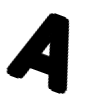

100


In [ ]:
im=rotate_character("/content/drive/MyDrive/assg2/refrence/A.png",-20)
h, w, c = im.shape
print(h)

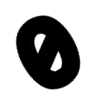

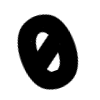

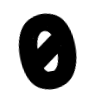

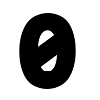

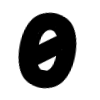

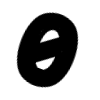

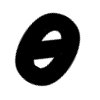

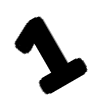

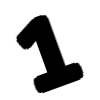

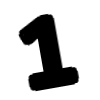

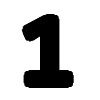

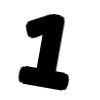

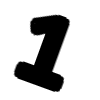

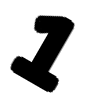

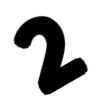

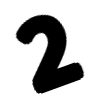

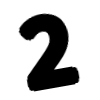

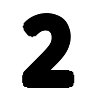

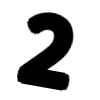

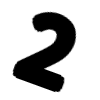

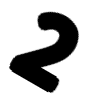

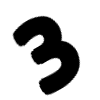

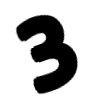

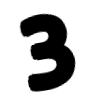

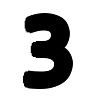

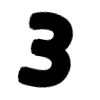

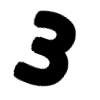

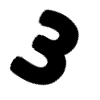

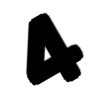

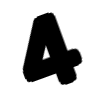

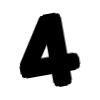

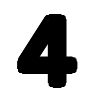

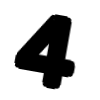

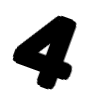

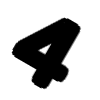

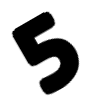

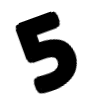

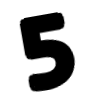

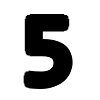

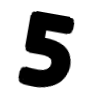

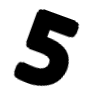

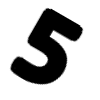

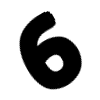

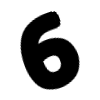

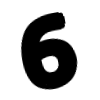

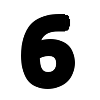

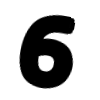

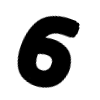

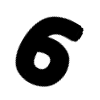

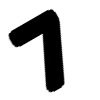

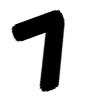

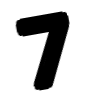

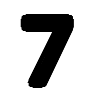

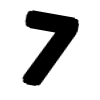

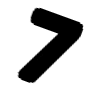

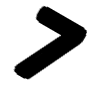

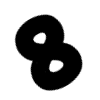

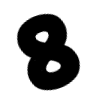

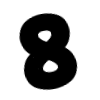

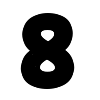

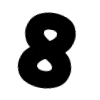

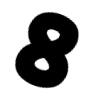

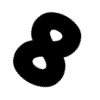

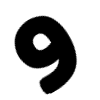

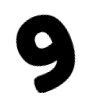

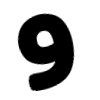

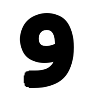

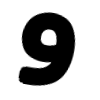

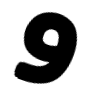

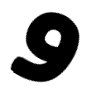

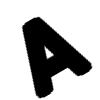

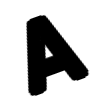

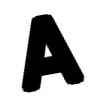

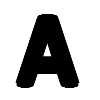

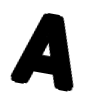

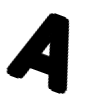

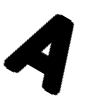

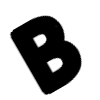

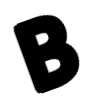

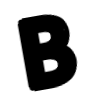

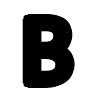

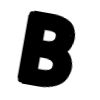

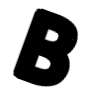

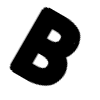

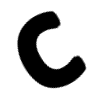

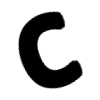

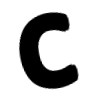

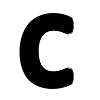

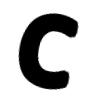

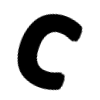

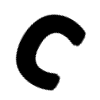

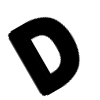

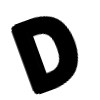

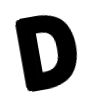

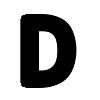

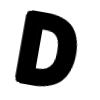

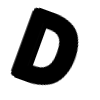

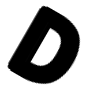

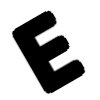

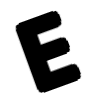

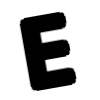

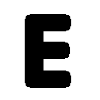

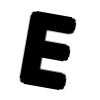

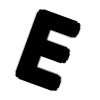

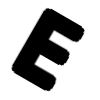

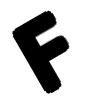

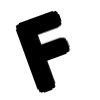

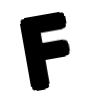

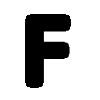

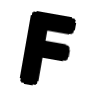

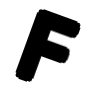

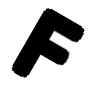

['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD', 'ODD']


In [ ]:
p1 = np.zeros((2112,100,100,3))
idx=0;
ch=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
label_p1 = []
for i in range(16):
  for j in range(7):
    deg=(3-j)*10
    p1[idx]=rotate_character("/content/drive/MyDrive/assg2/refrence/%c.png"%ch[i],deg)
    if i%2==0:
      label_p1.append("EVEN")
    else:
      label_p1.append("ODD")
    idx=idx+1
print(label_p1)
num_train = 2000

In [ ]:
num_train = 2000
for i in range(2000):
  idx=i+112
  p1[idx] = process_image("/content/drive/MyDrive/assg2/train/%d.png"%i)
  print(i)

In [ ]:
#from PIL import Image


#img_array = np.array(p1, dtype=np.uint8)
# for i, image in enumerate(img_array):
    # pil_image = Image.fromarray(image)
    # pil_image.save("/content/drive/MyDrive/assg2/result2/imgn_%d.png"%i)

In [ ]:
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

data_dir = "/content/drive/MyDrive/assg2/result2"
label_file = "/content/drive/MyDrive/assg2/result2/labels.txt"
def file_to_list(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    lines = content.split('\n')
    lines = [line.strip() for line in lines if line.strip()]
    return lines
lines = file_to_list(label_file)
combined_content = label_p1 + lines
image_size = (100, 100)
images = []
for i in range(2112):
    image_path = os.path.join(data_dir, "imgn_" + str(i) + ".png")
    image = Image.open(image_path).convert("L")
    image = np.array(image.resize(image_size)).flatten()
    images.append(image)
print(len(combined_content))
X_train, X_test, y_train, y_test = train_test_split(images,combined_content, test_size=0.2)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(images)
print(classification_report(combined_content, y_pred))

2112
              precision    recall  f1-score   support

        EVEN       0.99      0.99      0.99      1039
         ODD       0.99      0.99      0.99      1073

    accuracy                           0.99      2112
   macro avg       0.99      0.99      0.99      2112
weighted avg       0.99      0.99      0.99      2112



In [ ]:
import pickle

model = dt
model_file = "/content/drive/MyDrive/assg2/model/modeldt.pkl"
with open(model_file, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
num_train = 7
p3 = np.zeros((7,100,100,3))
for i in range(7):
    p3[i] = process_image("/content/drive/MyDrive/assg2/test/%d.png"%i)
    print(i)

0
1
2
3
4
5
6


In [ ]:
image_array = np.array(p3, dtype=np.uint8)
for i, image in enumerate(image_array):
    pil_image = Image.fromarray(image)
    pil_image.save("/content/drive/MyDrive/assg2/modelres/imgn_%d.png"%i)

In [ ]:
data_dir = "/content/drive/MyDrive/assg2/modelres"
labels_file = "/content/drive/MyDrive/assg2/test/labels.txt"
image_size = (100, 100)
with open(labels_file, 'r') as file:
    labels = file.read().splitlines()
images = []
for i in range( len(labels) ):
    image_path = os.path.join(data_dir, "imgn_" + str(i) + ".png")
    image = Image.open(image_path).convert("L")
    image = np.array(image.resize(image_size)).flatten()
    images.append(image)

In [ ]:
y_pred = clf.predict(images)
print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

        EVEN       1.00      1.00      1.00         3
         ODD       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
import pickle

model = clf
model_file = "/content/drive/MyDrive/assg2/model/modelk.pkl"
with open(model_file, 'wb') as file:
    pickle.dump(model, file)